In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier

In [2]:
AQS = "/Users/matthewq/Geol_599/week7/LA_AQS_2023.csv" 
df = pd.read_csv(AQS) 

In [3]:
# Create an "ozone only" data frame
df_O3 = df[(df['Parameter Name']=='Ozone') & (df['Duration Description']=='1 HOUR')]
df_O3.head()
o3V = df_O3["Arithmetic Mean"]
df_O3 = pd.DataFrame(data = {"O3" : o3V, 'date' : df_O3["Date (Local)"]})
df_O3.describe()

,O3
count,273.000000
mean,0.027899
std,0.007559
min,0.008333
25%,0.023958
50%,0.028458
75%,0.032958
max,0.045750


In [4]:
#create no2 only data set
df_NO2 = df[(df['Parameter Name']=='Nitrogen dioxide (NO2)') & (df['Duration Description']=='1 HOUR')]
df_NO2.head()
no2V = df_NO2["Arithmetic Mean"]
df_NO2 = pd.DataFrame(data = {"NO2" : no2V, 'date' : df_NO2["Date (Local)"]})
df_NO2.describe()

,NO2
count,1092.000000
mean,13.350240
std,6.208615
min,3.458333
25%,8.804167
50%,11.672917
75%,16.725000
max,33.466667


In [5]:
#create pm2.5 only data set
df_PM25 = df[(df['Parameter Name']=='PM2.5 - Local Conditions') & (df['Duration Description']=='1 HOUR')]
df_PM25.head()
pm25V = df_PM25["Arithmetic Mean"]
df_PM25 = pd.DataFrame(data = {"PM" : pm25V, 'date' : df_PM25["Date (Local)"]})
df_PM25.describe()

,PM
count,271.000000
mean,11.936013
std,5.106624
min,3.250000
25%,8.158333
50%,10.912500
75%,15.145833
max,31.979167


In [6]:
oz_n = df_NO2.merge(df_O3, on=['date'])

In [7]:
oz_n_pm = df_PM25.merge(oz_n, on=['date'])

In [8]:
oz_n_pm

,PM,date,NO2,O3
0,5.087500,2023-01-01,4.816667,0.031708
1,5.087500,2023-01-01,4.550000,0.031708
2,5.087500,2023-01-01,4.550000,0.031708
3,5.087500,2023-01-01,4.816667,0.031708
4,9.187500,2023-01-02,14.720833,0.015792
...,...,...,...,...
1079,10.875000,2023-09-29,8.614286,0.039048
1080,6.416667,2023-09-30,6.370833,0.030042
1081,6.416667,2023-09-30,6.370833,0.030042
1082,6.416667,2023-09-30,7.362500,0.030042


[Text(0.5, 0, 'Nitrogen Dioxide (ppb)'), Text(0, 0.5, 'Ozone (ppm)')]

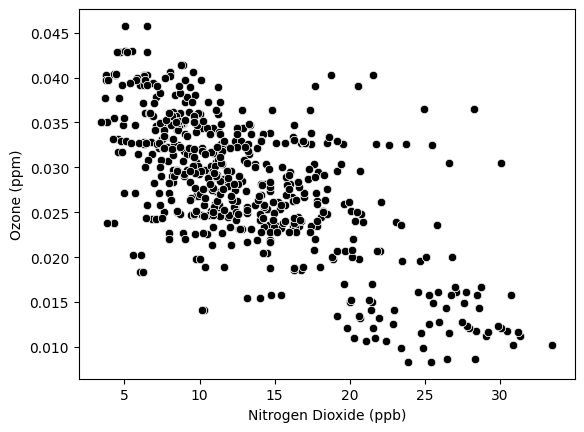

In [9]:
#scatterplot of O3 vs NO2
on_s = sns.scatterplot(data=oz_n_pm, x="NO2", y="O3", color='black')
on_s.set(xlabel='Nitrogen Dioxide (ppb)', ylabel='Ozone (ppm)')

[Text(0.5, 0, 'PM2.5 (µg $m^{-3}$)'), Text(0, 0.5, 'Ozone (ppm)')]

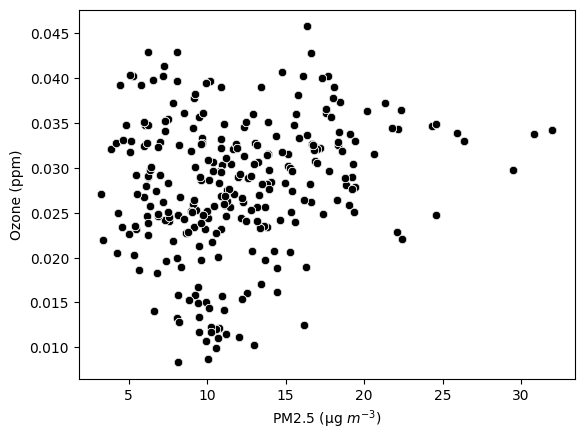

In [10]:
#scatterplot of O3 vs PM2.5
on_s = sns.scatterplot(data=oz_n_pm, x="PM", y="O3", color='black')
on_s.set(xlabel='PM2.5 (µg $m^{-3}$)', ylabel='Ozone (ppm)')

In [11]:
#1- determining summer months
#use .values to get array of 1 through 9 for each month
Months = pd.DatetimeIndex(oz_n_pm['date']).month.values
Months

array([1, 1, 1, ..., 9, 9, 9], dtype=int32)

In [12]:
#encoding summer as 1, winter as 0, neither as -1
#creates empty array 
sIdx = Months - Months #Set values (including winter) to zero
sIdx[Months == 12] = 0 #Set winter to 0
sIdx[Months == 1] = 0
sIdx[Months == 2] = 0

sIdx[Months == 6] = 1 #Set summer to 1
sIdx[Months == 7] = 1
sIdx[Months == 8] = 1

sIdx[Months == 3] = -1 #Set spring to -1
sIdx[Months == 4] = -1
sIdx[Months == 5] = -1

sIdx[Months == 9] = -1 #Set fall to -1
sIdx[Months == 10] = -1
sIdx[Months == 11] = -1

In [13]:
oz_n_pm['season'] = sIdx
oz_n_pm

,PM,date,NO2,O3,season
0,5.087500,2023-01-01,4.816667,0.031708,0
1,5.087500,2023-01-01,4.550000,0.031708,0
2,5.087500,2023-01-01,4.550000,0.031708,0
3,5.087500,2023-01-01,4.816667,0.031708,0
4,9.187500,2023-01-02,14.720833,0.015792,0
...,...,...,...,...,...
1079,10.875000,2023-09-29,8.614286,0.039048,-1
1080,6.416667,2023-09-30,6.370833,0.030042,-1
1081,6.416667,2023-09-30,6.370833,0.030042,-1
1082,6.416667,2023-09-30,7.362500,0.030042,-1


In [14]:
oz_n_pm = oz_n_pm[oz_n_pm['season'] > -1]
oz_n_pm.describe()

,PM,NO2,O3,season
count,604.000000,604.000000,604.000000,604.000000
mean,11.883327,14.908291,0.025534,0.609272
std,4.928007,6.819712,0.007501,0.488318
min,3.250000,4.250000,0.008333,0.000000
25%,8.545833,9.700000,0.022000,0.000000
50%,10.900000,13.425000,0.026417,1.000000
75%,15.266667,19.133333,0.031542,1.000000
max,31.979167,33.466667,0.042833,1.000000


In [15]:
X = oz_n_pm[["PM", "O3", "NO2"]].to_numpy()

In [16]:
y = oz_n_pm["season"]

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
959    1
960    1
961    1
962    1
963    1
Name: season, Length: 604, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split
#Splitting data set - test = 10% of data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#splitting training data set further to get validation set (15% of whole data set) leaving training set 75% of whole data set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17)

In [19]:
alphas = np.arange(0, 1.05, 0.05).tolist()

In [29]:
#1- ridge classifier 
for i in alphas:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train, y_train)
    print(seasonClassifier.score(X_test, y_test))

0.8512396694214877
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356
0.8264462809917356


2: the cost function is an ordinary least squares cost function plus an added term for minimizing the fitting coefficients (lambda between 0-1 multiplied by the sum of the fitting parameters squared)

3: On training data, we get the highest accuracy using a ridge parameter of 0.00

The accuracy is 85.1% meaning our error is 14.9%

In [30]:
#running ridge classifier to classify summer vs winter on validation set
for i in alphas:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_val, y_val)
    print(seasonClassifier.score(X_test, y_test))

0.8760330578512396
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877
0.8512396694214877


4: On validation data, we get the highest accuracy using a ridge parameter of 0.00

The accuracy is 87.6% meaning our error is 12.4%

In [31]:
#5- Final Model
seasonClassifier = RidgeClassifier(alpha=0)
seasonClassifier.fit(X_val, y_val)
print(seasonClassifier.score(X_test, y_test))

0.8760330578512396


In [25]:
#6- re-splitting our data
#Splitting data set - test = 10% of data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#splitting training data set further to get validation set (20% of whole data set) leaving training set 60% of whole data set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17)

In [26]:
for i in alphas:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_train, y_train)
    print(seasonClassifier.score(X_train, y_train))

0.8704663212435233
0.8730569948186528
0.8730569948186528
0.8730569948186528
0.8730569948186528
0.8730569948186528
0.8730569948186528
0.8730569948186528
0.8730569948186528
0.8730569948186528
0.8730569948186528
0.8730569948186528
0.8704663212435233
0.8704663212435233
0.8704663212435233
0.8704663212435233
0.8704663212435233
0.8704663212435233
0.8704663212435233
0.8704663212435233
0.8704663212435233


In [27]:
for i in alphas:
    seasonClassifier = RidgeClassifier(alpha=i)
    seasonClassifier.fit(X_val, y_val)
    print(seasonClassifier.score(X_val, y_val))

0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526
0.8350515463917526


Results are different after data is re-split.

In [28]:
#7- Logistic regression model
log = linear_model.LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
log.score(X_test, y_test)

0.8429752066115702

In this case, the ridge regresssion performs better than the logistic regression (87.6% accuracy vs 84.3% accuracy).